Imports needed librarys

In [ ]:
import keras
import keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np

Imports dataset of 28x28 pixel images of pixels from MNIST, x values are input and y values are output

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Determines number of examples for each class for training- and test data and puts this into two lists.

In [ ]:
print("Train:")
train_class_count = []
for digit in range(10):
  counter = 0
  for label in y_train:
    if label == digit:
      counter = counter + 1
  train_class_count.append(counter)
  print("Class: " + str(digit) + " Count: " + str(counter))

print(train_class_count)

print("Test:")
test_class_count = []
for digit in range(10):
  counter = 0
  for label in y_test:
    if label == digit:
      counter = counter + 1
  test_class_count.append(counter)
  print("Class: " + str(digit) + " Count: " + str(counter))

print(test_class_count)

Train:
Class: 0 Count: 5923
Class: 1 Count: 6742
Class: 2 Count: 5958
Class: 3 Count: 6131
Class: 4 Count: 5842
Class: 5 Count: 5421
Class: 6 Count: 5918
Class: 7 Count: 6265
Class: 8 Count: 5851
Class: 9 Count: 5949
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
Test:
Class: 0 Count: 980
Class: 1 Count: 1135
Class: 2 Count: 1032
Class: 3 Count: 1010
Class: 4 Count: 982
Class: 5 Count: 892
Class: 6 Count: 958
Class: 7 Count: 1028
Class: 8 Count: 974
Class: 9 Count: 1009
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


Plots the data in the lists in two barplots

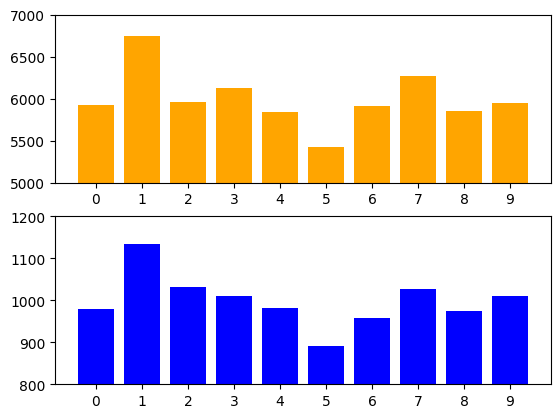

In [ ]:
train_class_numbers = np.array(train_class_count)
test_class_numbers = np.array(test_class_count)
positions = np.arange(10)

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.bar(positions, train_class_numbers, color='orange')
ax2.bar(positions, test_class_numbers, color='blue')

ax1.set_ylim(5000,7000)
ax2.set_ylim(800,1200)
ax1.set_xticks(positions)
ax2.set_xticks(positions)

plt.show()

1. Defines a function to normalize an array.

2. Normalizes training- and test input values.

3. Converts the training- and test output values into the form of onehot numbers.



In [ ]:
#1
def normalize_input(arr):
  return arr/np.max(arr)

#2
x_train_norm = normalize_input(x_train)

x_test_norm = normalize_input(x_test)

#3
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)

y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)

Creates, defines and compiles the deep learning model and prints a summary of the model.

In [ ]:
#1
model = keras.Sequential([
          keras.Input(shape = (28, 28)),
          layers.Flatten(),
          layers.Dense(32, activation="tanh"),
          layers.Dense(32, activation="tanh"),
          layers.Dense(32, activation="tanh"),
          layers.Dense(32, activation="tanh"),

          layers.Dense(10, activation="softmax")])

#2
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")

#3
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 28618 (111.79 KB)
Trainable params: 28618 

Trains the model for the desired amount of epochs (10 in our case).

In [ ]:
h = model.fit(x_train_norm, y_train_cat, batch_size=784, epochs=10, validation_split=0.1)

Epoch 1/10
69/69 [==============================] - 3s 23ms/step - loss: 1.1821 - accuracy: 0.6994 - val_loss: 0.5554 - val_accuracy: 0.8840
Epoch 2/10
69/69 [==============================] - 1s 19ms/step - loss: 0.4637 - accuracy: 0.8886 - val_loss: 0.3034 - val_accuracy: 0.9290
Epoch 3/10
69/69 [==============================] - 1s 17ms/step - loss: 0.3106 - accuracy: 0.9179 - val_loss: 0.2289 - val_accuracy: 0.9402
Epoch 4/10
69/69 [==============================] - 1s 12ms/step - loss: 0.2493 - accuracy: 0.9317 - val_loss: 0.1945 - val_accuracy: 0.9465
Epoch 5/10
69/69 [==============================] - 1s 10ms/step - loss: 0.2132 - accuracy: 0.9402 - val_loss: 0.1691 - val_accuracy: 0.9538
Epoch 6/10
69/69 [==============================] - 1s 10ms/step - loss: 0.1849 - accuracy: 0.9476 - val_loss: 0.1530 - val_accuracy: 0.9588
Epoch 7/10
69/69 [==============================] - 1s 13ms/step - loss: 0.1644 - accuracy: 0.9533 - val_loss: 0.1421 - val_accuracy: 0.9625
Epoch 8/10
69

Plots the training set loss and the validation set loss to compare them over the amount of epochs.

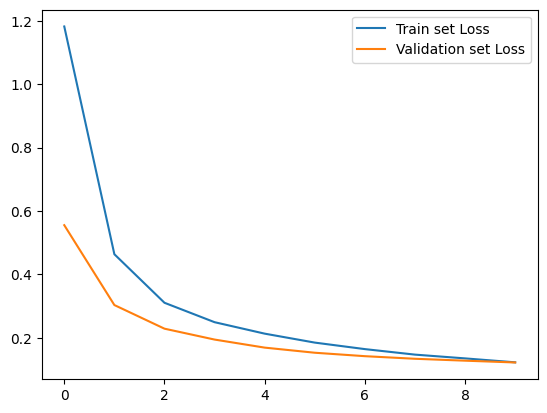

In [ ]:
plt.plot(h.history['loss'], label="Train set Loss")
plt.plot(h.history['val_loss'], label="Validation set Loss")
plt.legend()

plt.show()

Plots the training set accuracy and the validation set accuracy to compare them over the amount of epochs.

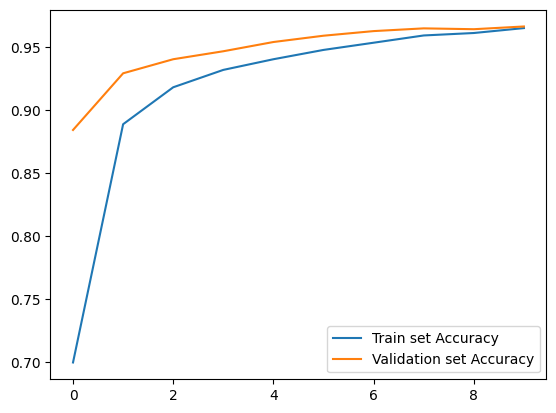

In [ ]:
plt.plot(h.history['accuracy'], label="Train set Accuracy")
plt.plot(h.history['val_accuracy'], label="Validation set Accuracy")
plt.legend()

plt.show()

1. Tests the model on the test data and prints its accuracy when tested on this data.

2. Prints the accuracy of the model for each class.

In [ ]:
#1
predictions = model.predict(x_test_norm)

count = 0

for p, l in zip(predictions, y_test_cat):
  if np.argmax(p)==np.argmax(l): count += 1

acc = count/predictions.shape[0]
print (acc)

#2
for n in range(10):
  count = 0
  for p, l in zip(predictions, y_test_cat):
    if np.argmax(p)==np.argmax(l)==n:
      count += 1
  print(str(n) + ": " + str(count/test_class_count[n]))

313/313 [==============================] - 1s 2ms/step
0.9574
0: 0.9877551020408163
1: 0.9876651982378855
2: 0.9583333333333334
3: 0.9485148514851485
4: 0.9541751527494908
5: 0.9461883408071748
6: 0.9551148225469729
7: 0.9494163424124513
8: 0.9332648870636551
9: 0.9484638255698712


Below are the definitions of the different functions which add corruption to the data

The function below moves empty rows/columns of pixels from random borders to the opposite ones, for a specified number of times, actually moving the handwritten digit in a random direction inside the picture. Shift.



In [ ]:
def loc_noise(arr, moves):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    shifted = np.array(arr[n])
    left_moves = moves

    directions = np.array((1,2,3,4))
    np.random.shuffle(directions)
    directions = directions[1:]

    while left_moves!=0:
      direction = np.random.choice(directions)
      if direction == 1: shifted = np.roll(shifted, -1, axis=0)
      if direction == 2: shifted = np.roll(shifted, 1, axis=0)
      if direction == 3: shifted = np.roll(shifted, -1, axis=1)
      if direction == 4: shifted = np.roll(shifted, 1, axis=1)

      if np.any(shifted[0,:]!=0) or np.any(shifted[-1,:]!=0) \
      or np.any(shifted[:,0]!=0) or np.any(shifted[:,-1]!=0):
        break

      left_moves -= 1

    new_arr[n] = shifted

  return new_arr

The function below turns to 0 random pixels which are part of the digit depiction. Digit noise.



In [ ]:
def scatter_noise_neg(arr, perc):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    corrupted = np.array(arr[n])

    tot = np.sum(np.where(corrupted!=0, 1, 0))
    to_change = int((float(tot)/100)*perc)

    while to_change > 0:
      indexes = np.argwhere(corrupted!=0)
      choice = np.random.choice(np.arange(len(indexes)))
      pixel = indexes[choice]
      corrupted[pixel[0],pixel[1]] = 0
      to_change -= 1

    new_arr[n] = corrupted

  return new_arr

The function below turns to 255 random pixels which are not part of the digit depiction. Background noise.


In [ ]:
def scatter_noise_pos(arr, perc):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    corrupted = np.array(arr[n])

    tot = np.sum(np.where(corrupted==0, 1, 0))
    to_change = int((float(tot)/100)*perc)

    while to_change > 0:
      indexes = np.argwhere(corrupted==0)
      choice = np.random.choice(np.arange(len(indexes)))
      pixel = indexes[choice]
      corrupted[pixel[0],pixel[1]] = 255
      to_change -= 1

    new_arr[n] = corrupted

  return new_arr

The function below modifies random pixels by increasing them if they are equal to 0 or setting them low if they are different from 0. Mixed noise.


In [ ]:
def scatter_noise_all(arr, perc):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    corrupted = np.array(arr[n])

    tot = 28*28
    to_change = int((float(tot)/100)*perc)

    while to_change > 0:
      indexes = np.transpose(np.reshape(np.indices((28, 28)), (2, 28*28)))
      choice = np.random.choice(np.arange(len(indexes)))
      pixel = indexes[choice]
      if corrupted[pixel[0],pixel[1]] != 0:
        corrupted[pixel[0],pixel[1]] = np.random.choice(np.arange(0,55))
      else:
        corrupted[pixel[0],pixel[1]] = np.random.choice(np.arange(200,255))
      to_change -= 1

    new_arr[n] = corrupted

  return new_arr

corr = scatter_noise_all(x_train, 1)

The function below turns to 0 random stripes (horizontal or vertical) which are part of the digit depiction. Digit stripes.



In [ ]:
def stripe_noise_neg(arr, lines):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    corrupted = np.array(arr[n])
    left_lines = lines
    h_indexes = np.where(np.any(corrupted!=0, axis=0))[0]
    v_indexes = np.where(np.any(corrupted!=0, axis=1))[0]
    indexes = [(0,idx) for idx in h_indexes]+[(1,idx) for idx in v_indexes]

    while left_lines!=0:
      if len(indexes)==0:
        print ("Exhausted removable lines!")
        break
      choice = np.random.choice(np.arange(len(indexes)))
      direction, idx = indexes[choice]
      indexes.pop(choice)

      if direction == 0:
         corrupted[idx,:] = 0

      if direction == 1:
         corrupted[:,idx] = 0

      left_lines -= 1

    new_arr[n] = corrupted

  return new_arr


The function below turns to 255 random stripes (horizontal or vertical). Picture stripes.


In [ ]:
def stripe_noise_pos(arr, lines):
  new_arr = np.zeros(arr.shape)

  for n in range(len(arr)):
    corrupted = np.array(arr[n])
    left_lines = lines

    directions = np.array((0,1))
    direction = np.random.choice(directions)

    while left_lines!=0:
      choice = np.random.choice(np.arange(28))

      if direction == 0:
         corrupted[choice,:] = 255

      if direction == 1:
         corrupted[:,choice] = 255

      left_lines -= 1

    new_arr[n] = corrupted

  return new_arr

stripes = stripe_noise_pos(x_train, 3)

Each section of code below is used to corrupt test- and training data respectively with the different types of corruption. x_train_A_corruption_type is the augmented input for training the model on corrupted data and includes both the original input and the corrupted version.

Shift

In [ ]:
n = number_of_shifted_lines_for_test_data  #Change as desired
x_test_shift = normalize_input(loc_noise(x_test, n))

In [ ]:
n = number_of_shifted_lines_for_train_data #Change as desired
x_train_shift = normalize_input(loc_noise(x_train))

x_train_A_shift = np.concatenate(x_train_norm, x_train_shift)

Digit noise

In [ ]:
n = percentage_of_pixels_changed_for_test_data #Change as desired
x_test_digit_noise = normalize_input(scatter_noise_neg(x_test, n))

In [ ]:
n = percentage__of_pixels_changed_for_train_data #Change as desired
x_train_digit_noise = normalize_input(scatter_noise_neg(x_train), n)

x_train_A_digit_noise = np.concatenate(x_train_norm, x_train_digit_noise)

Background noise

In [ ]:
n = percentage_of_pixels_changed_for_test_data #Change as desired
x_test_back_noise = normalize_input(scatter_noise_pos(x_test, n))

In [ ]:
n = percentage__of_pixels_changed_for_train_data #Change as desired
x_train_back_noise = normalize_input(scatter_noise_pos(x_train, n))

x_train_A_back_noise = np.concatenate(x_train_norm, x_train_back_noise)

Mixed noise

In [ ]:
#
n = percentage_of_pixels_changed_for_test_data #Change as desired
x_test_mix_noise = normalize_input(scatter_noise_all(x_test, n))

In [ ]:
n = percentage__of_pixels_changed_for_train_data #Change as desired
x_train_mix_noise = normalize_input(scatter_noise_all(x_train, n))

x_train_A_mix_noise = np.concatenate(x_train_norm, x_train_mix_noise)

Digit stripes

In [ ]:
n = number_of_lines_changed_for_test_data #Change as desired
x_test_dig_strip = normalize_input(stripe_noise_neg(x_test, n))

In [ ]:
n = number_of_lines_changed_for_train_data #Change as desired
x_train_dig_strip = normalize_input(stripe_noise_neg(x_train, n))

x_train_A_dig_strip = np.concatenate(x_train_norm, x_train_dig_strip)

Picture stripes

In [ ]:
n = number_of_lines_changed_for_test_data #Change as desired
x_test_pic_strip = normalize_input(stripe_noise_pos(x_test n))

In [ ]:
n = number_of_lines_changed_for_train_data #Change as desired
x_train_pic_strip = normalize_input(stripe_noise_pos(x_train, n))

x_train_A_shift = np.concatenate(x_train_norm, x_train_pic_strip)

1. Tests the model on the corrupted test data.

2. Prints its accuracy for that level of corruption.

In [ ]:
#1
x_test_corrupt = corrupted_test_values #For example x_test_shift or x_test_picture_stripes, changed as desired
predictions_corrupt = model.predict(x_test_corrupt)

#2
count = 0
for p, l in zip(predictions_corrupt, y_test_cat):
  if np.argmax(p)==np.argmax(l): count += 1

acc = count/predictions_corrupt.shape[0]

print(acc)

313/313 [==============================] - 1s 2ms/step
0.251


1. Doubles onehot output values to match the augmented input

2. Redefines and recompiles the model to reset it and make it able to train from the start on corrupted data. Trains the model on the desired augmented data.

In [ ]:
#1
y_train_A = np.concatenate(y_train_cat, y_train_cat)

#2
x_train_corrupt = augmented_train_data #For example x_train_A_shift or x_train_A_mix_noise

model = keras.Sequential([
          keras.Input(shape = (28, 28)),
          layers.Flatten(),
          layers.Dense(32, activation="tanh"),
          layers.Dense(32, activation="tanh"),
          layers.Dense(32, activation="tanh"),
          layers.Dense(32, activation="tanh"),

          layers.Dense(10, activation="softmax")])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")

h = model.fit(x_train_corrupt, y_train_A, batch_size=784, epochs=10, validation_split=0.1)